## 데이터 검증

- 결측값
- 이상값
    - 정규분포를 기준으로 상한/하한값을 구한다.

### 결측치 처리 방법

- 제거
- 평균치 삽입법 (inserting means approach)
    - 시계열에 한해서
    - 나머지 자료를 이용하여 평균을 낸다.
- 보삽법 (interpolation method)
- 평가치추정법 (estimating value approach)

### 이상치 판정 방법

- 모수적 방법 (정규분포)
    - 모수 --> 정규분포
    - 회귀모형 기반 : 회귀모형 ($ax + b$) 에 적합(넣은) 후 잔차 (산점도에서 $ax + b$ 로 설명 안되는 면적) 분석
    - 혼합 모수적 분포 기반 : 정상자료는 표준정규분포($N(0,1)$) 로 부터 생성되나, 비정상자료는 분산이 큰 정규분포($N(평균, 큰분산)$)
    - 잔차가 유난히 큰 데이터는 이상치로 판단
- 비모수적 방법론
    - 정규분포인지 아닌지 모름 (정규분포가 아닐 것이 유력)
    - 히스토그램을 그려봐서 판단
    - 커널 함수 기반 : 데이터를 잘 설명하는 수식(함수 $f(x)$ 를 찾음)
    - 데이터 전체에 대한 $f(x1)$ 를 계산하고 데이터 상위값과 하위값을 제거한 후 $f(x2)$ 를 계산
    - $f(x1)$ 와 $f(x2)$ 값이 많이 차이나는 지점이 있으면 해당 데이터가 이상치다.
- 군집기반
    - 알고리즘
        - SOM
        - K-means
        - EM
- k근접 이웃기반
    - 각 자료로부터 k번째 이웃까지 거리(유클리디안거리 $\sqrt{x\frac{2}{1}+x\frac{2}{2}}$)를 보고 비정상 점수로 이용하는 방법
    - 산점도에서 점의 그룹간의 상대적 밀도(density)를, 비정상점수로 계산
    - 밀도가 낮은 그룹은 비정상(이상) 으로 판단한다.
    - 비정상 점수는 == 밀도

### table() 로 결측치 확인

In [1]:
a <- rep(c(NA, 1/0:3), 10)

In [2]:
table(a)

a
0.333333333333333               0.5                 1               Inf 
               10                10                10                10 

In [3]:
table(a, exclude = NULL)

a
0.333333333333333               0.5                 1               Inf 
               10                10                10                10 
             <NA> 
               10 

### 이상치 찾기

In [4]:
valida <- read.csv("datas/dataValidation.csv", header = TRUE, encoding = "UTF-8")

In [5]:
str(valida)

'data.frame':	150 obs. of  3 variables:
 $ gender: int  1 2 1 1 2 1 1 1 1 1 ...
 $ group : int  1 1 1 1 1 1 1 1 1 1 ...
 $ score : num  3.04 3.19 3.09 3.54 2.48 3.29 2.65 2.98 2.44 3.03 ...


#### gender 에 1 보다 작거나 2 보다 큰 값이 있는지 확인

In [14]:
valida[valida[,1] < 1 | valida[,1] > 2, ]

,gender,group,score
30,5,3,2.97


#### group 에 3 보다 큰 값

In [15]:
valida[valida[,2] > 3, ]

,gender,group,score
54,1,7,2.53


#### score 가 5를 초과하는지 확인

In [16]:
valida[valida[,3] > 5, ]

,gender,group,score
27,1,1,7
78,1,2,10


### 그럼 이 이상치를 어떻게 할 것인가?

- 삭제
- 평균

## 특정값 결측으로 처리하기

In [19]:
vScore <- c(3, 1, 4, 5, 2, 2, 1, 2, 5)
factor(vScore)

[1] 3 1 4 5 2 2 1 2 5
Levels: 1 2 3 4 5

In [24]:
fScore2 <- factor(vScore, labels = "f", exclude = c(2, 4), ordered = is.ordered(vScore))
print(fScore2)

[1] f2   f1   <NA> f3   <NA> <NA> f1   <NA> f3  
Levels: f1 f2 f3


#### 서열성을 부여하기

In [25]:
fScore3 <- factor(vScore, labels = "f", exclude = c(2, 4), ordered = T)
print(fScore3)

[1] f2   f1   <NA> f3   <NA> <NA> f1   <NA> f3  
Levels: f1 < f2 < f3


## 속성별로 NA 개수 파악하기

In [26]:
vX1 <- c(1, 2, 3, NA, 5, -9, -8, 1, 2, 3)
vX2 <- c(1, 2, 3, 4, NA, NA, -9, 1, 2, -8)
dTemp <- data.frame(vX1, vX2)

In [27]:
apply(apply(dTemp, 2, is.na), 2, sum)

vX1 vX2 
  1   2

## 속성별로 NA 의 갯수를 반환 예제 2

In [30]:
icheon_regression <- read.csv("datas/reproduct_temp_rain_UTF8.csv")

In [31]:
str(icheon_regression)

'data.frame':	14372 obs. of  47 variables:
 $ X.2            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 발생년월일2    : Factor w/ 1985 levels "2010-01-01","2010-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ X.1            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 발생년월일     : int  20100101 20100101 20100101 20100101 20100101 20100101 20100101 20100101 20100101 20100101 ...
 $ 발생시         : Factor w/ 24 levels "00시","01시",..: 2 2 2 2 2 2 14 14 14 14 ...
 $ X              : num  127 127 127 127 127 ...
 $ Y              : num  37.3 37.3 37.3 37.3 37.3 ...
 $ 발생           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ 사망           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ 중상           : int  0 0 0 0 0 0 0 0 0 1 ...
 $ 경상           : int  0 1 0 0 0 0 1 1 1 0 ...
 $ 부상신고       : int  0 0 1 1 1 1 0 0 0 0 ...
 $ 사고유형       : Factor w/ 3 levels "차대사람","차대차",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ 사고유형.1     : Factor w/ 12 levels "공작물충돌","기타",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ 사고유형.2     : Factor w/ 14 levels "공작물충돌","기타",..: 13 13 13 13 13 13 1

In [32]:
summary(icheon_regression)

      X.2            발생년월일2         X.1          발생년월일      
 Min.   :    1   2012-09-14:   28   Min.   :    1   Min.   :20100101  
 1st Qu.: 3594   2014-04-29:   28   1st Qu.: 3594   1st Qu.:20110605  
 Median : 7186   2015-10-03:   28   Median : 7186   Median :20121111  
 Mean   : 7186   2011-09-24:   27   Mean   : 7186   Mean   :20124947  
 3rd Qu.:10779   2010-01-01:   26   3rd Qu.:10779   3rd Qu.:20140610  
 Max.   :14372   2011-01-12:   26   Max.   :14372   Max.   :20151231  
                 (Other)   :14209                                     
     발생시           X               Y              발생        사망        
 18시   :1062   Min.   :126.9   Min.   :37.04   Min.   :1   Min.   :0.00000  
 21시   : 877   1st Qu.:127.4   1st Qu.:37.24   1st Qu.:1   1st Qu.:0.00000  
 20시   : 860   Median :127.5   Median :37.27   Median :1   Median :0.00000  
 19시   : 849   Mean   :127.5   Mean   :37.25   Mean   :1   Mean   :0.01406  
 22시   : 820   3rd Qu.:127.5   3rd Qu.:37.28   3rd Qu.:1   3rd 

In [33]:
apply(apply(icheon_regression, 2, is.na), 2, sum)

X.2     발생년월일2             X.1      발생년월일          발생시 
              0               0               0               0               0 
              X               Y            발생            사망            중상 
              0               0               0               0               0 
           경상        부상신고        사고유형      사고유형.1      사고유형.2 
              0               0               0               0               0 
   인적유발요인    인적유발요일  차량적유발요인        법규위반      법규위반.1 
              0               0               0               0               0 
     법규위반.2   법규위반.8종.        행동유형      행동유형.1      당사자종별 
              0               0               0               0               0 
   당사자종별.1      차량용도별    차량용도별.1    차량용도별.2        도로형태 
              0               0               0               0               0 
     도로형태.1        기상상태      사상자성별      사상자연령            개요 
              0               0               0               0               0 
           year             mon             day   발생년월일2_2        weekdays 
              0               0               0               0               0 
       주중토일      발생시_num 발생시_interval      강수량.mm.        평균기온 
              0               0               0            9175              19 
       최저기온        최고기온 
              8               8

In [34]:
which(is.na(icheon_regression$평균기온))

[1] 1218 1219 1220 1221 1222 1223 1224 1225 8238 8239 8240 8241 8242 8243 8244
[16] 8245 8246 8247 8248

In [39]:
icheon_regression[c(which(is.na(icheon_regression$평균기온))), '발생년월일2']

[1] 2010-06-20 2010-06-20 2010-06-20 2010-06-20 2010-06-20 2010-06-20
 [7] 2010-06-20 2010-06-20 2013-05-02 2013-05-02 2013-05-02 2013-05-02
[13] 2013-05-02 2013-05-02 2013-05-02 2013-05-02 2013-05-02 2013-05-02
[19] 2013-05-02
1985 Levels: 2010-01-01 2010-01-02 2010-01-03 2010-01-05 ... 2015-12-31

In [40]:
# 12.4도 (서울 2013년 5월 2일 평균기온)
# 20.6도 (이천 2015년 5월 2일 평균기온)

In [41]:
icheon_regression[c(1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225), '평균기온'] <- 20.6

In [42]:
icheon_regression[c(8238, 8239, 8240, 8241, 8242, 8243, 8244, 8245, 8246, 8247, 8248), '평균기온'] <- 12.4

## NA 가 존재하는 모든 행 출력

In [43]:
diris <- iris

In [44]:
# 임의로 결측값(NA) 로 수정하기

diris[c(10, 20, 25, 30, 32, 40, 50), 3] <- NA
diris[c(33, 66, 100, 123, 133), 1] <- NA

In [45]:
diris[! complete.cases(diris), ]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
10,4.9,3.1,NA,0.1,setosa
20,5.1,3.8,NA,0.3,setosa
25,4.8,3.4,NA,0.2,setosa
30,4.7,3.2,NA,0.2,setosa
32,5.4,3.4,NA,0.4,setosa
33,NA,4.1,1.5,0.1,setosa
40,5.1,3.4,NA,0.2,setosa
50,5.0,3.3,NA,0.2,setosa
66,NA,3.1,4.4,1.4,versicolor
100,NA,2.8,4.1,1.3,versicolor


## 데이터를 리모델링하면서 결측의 위치 확인

In [46]:
install.packages('reshape')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [47]:
install.packages('reshape2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [48]:
library(reshape)
library(reshape2)


Attaching package: ‘reshape2’

The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast



In [49]:
ChickWeight_TM <- ChickWeight

In [50]:
?ChickWeight

### 결측치가 있는 행 삭제

In [51]:
x <- data.frame(a = c(1, 2, 3), b = c("a", NA, "c"), c = c("a", "b", NA))
x

a,b,c
1,a,a
2,NA,b
3,c,NA


In [52]:
dSample <- data.frame(x = c(1, 2, 3), y = c(0, 10, NA))
dSample

x,y
1,0
2,10
3,NA


### 결측치와 이상값이 있는 행 삭제

In [53]:
vX1 <- c(1, 2, 3, NA, 5, -9, -8, 1, 2, 3)
vX2 <- c(1, 2, 3, 4, NA, NA, -9, 1, 2, -8)
dX <- data.frame(vX1, vX2)
dX

vX1,vX2
1,1
2,2
3,3
NA,4
5,NA
-9,NA
-8,-9
1,1
2,2
3,-8


dX의 vX1 에서 제외한다.

In [54]:
dX <- dX[!dX$vX1 < 0, ]
dX

,vX1,vX2
1,1,1
2,2,2
3,3,3
NA,NA,NA
5,5,NA
8,1,1
9,2,2
10,3,-8


### 두 속성 중에 하나라도 결측값을 가진 행 모두 삭제

In [55]:
vX1 <- c(1, 2, 3, NA, 5, -9, -8, 1, 2, 3)
vX2 <- c(1, 2, 3, 4, NA, NA, -9, 1, 2, -8)
dX <- data.frame(vX1, vX2)

In [56]:
dX[!is.na(dX$vX1) & !is.na(dX$vX2), ]

,vX1,vX2
1,1,1
2,2,2
3,3,3
7,-8,-9
8,1,1
9,2,2
10,3,-8


### Vector obj 에서 결측값을 중앙값으로 치환

In [57]:
replacement <- data.frame(val = c(1, 2, 3, 4, NA, 5, NA))
replacement

val
1
2
3
4
NA
5
NA


In [59]:
replacement$val[is.na(replacement$val)] <- median(replacement$val, na.rm = TRUE)

In [60]:
replacement

val
1
2
3
4
3
5
3


In [61]:
?within

### DataFrame obj 에서 결측값을 중앙값으로 치환

In [62]:
iris_repl <- iris
iris_repl[1, 1] = NA

In [63]:
head(iris_repl)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
NA,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [64]:
replacement_df <- sapply(split(iris_repl$Sepal.Length, iris_repl$Species), median, na.rm = TRUE)

In [65]:
replacement_df

setosa versicolor  virginica 
       5.0        5.9        6.5

In [66]:
iris_repl <- within(iris_repl, {
    Sepal.Length <- ifelse(is.na(Sepal.Length), replacement_df[Species], Sepal.Length)
})

In [67]:
head(iris_repl)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.0,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [68]:
# 데이터셋1[데이터셋2$속성명]

# 데이터셋2 는 검색기준

replacement_df[iris_repl$Species]

setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa     setosa     setosa     setosa     setosa     setosa     setosa 
       5.0        5.0        5.0        5.0        5.0        5.0        5.0 
    setosa versicolor versicolor versicolor versicolor versicolor versicolor 
       5.0        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor versicolor versicolor versicolor versicolor versicolor 
       5.9        5.9        5.9        5.9        5.9        5.9        5.9 
versicolor versicolor  virginica  virginica  virginica  virginica  virginica 
       5.9        5.9        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica  virginica  virginica  virginica  virginica 
       6.5        6.5        6.5        6.5        6.5        6.5        6.5 
 virginica  virginica  virginica 
       6.5        6.5        6.5

### kNN 으로 k개 근접 이웃의 가중평균으로 치환

In [69]:
iris_na <- iris
iris_na[c(10, 20, 25, 40, 32), 3] <- NA
iris_na[c(33, 100, 123), 1] <- NA

In [70]:
install.packages('DMwR')

also installing the dependencies ‘TTR’, ‘gplots’, ‘xts’, ‘quantmod’, ‘abind’, ‘ROCR’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [71]:
library(DMwR)

Loading required package: lattice
Loading required package: grid


In [72]:
iris_na[!complete.cases(iris_na), ]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
10,4.9,3.1,NA,0.1,setosa
20,5.1,3.8,NA,0.3,setosa
25,4.8,3.4,NA,0.2,setosa
32,5.4,3.4,NA,0.4,setosa
33,NA,4.1,1.5,0.1,setosa
40,5.1,3.4,NA,0.2,setosa
100,NA,2.8,4.1,1.3,versicolor
123,NA,2.8,6.7,2.0,virginica


In [84]:
knnImputation(iris_na[1:4], k = 10) [c(10, 20, 25, 32, 33, 40, 100, 123), ]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
10,4.900000,3.1,1.452250,0.1
20,5.100000,3.8,1.539881,0.3
25,4.800000,3.4,1.457144,0.2
32,5.400000,3.4,1.483821,0.4
33,5.462532,4.1,1.500000,0.1
40,5.100000,3.4,1.475718,0.2
100,5.891169,2.8,4.100000,1.3
123,7.077197,2.8,6.700000,2.0


In [74]:
?knnImputation

In [85]:
install.packages('Amelia')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [86]:
library(Amelia)

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [91]:
data(freetrade)

In [92]:
summary(freetrade)

      year        country              tariff           polity      
 Min.   :1981   Length:171         Min.   :  7.10   Min.   :-8.000  
 1st Qu.:1985   Class :character   1st Qu.: 16.30   1st Qu.:-2.000  
 Median :1990   Mode  :character   Median : 25.20   Median : 5.000  
 Mean   :1990                      Mean   : 31.65   Mean   : 2.905  
 3rd Qu.:1995                      3rd Qu.: 40.80   3rd Qu.: 8.000  
 Max.   :1999                      Max.   :100.00   Max.   : 9.000  
                                   NA's   :58       NA's   :2       
      pop                gdp.pc           intresmi          signed      
 Min.   : 14105080   Min.   :  149.5   Min.   :0.9036   Min.   :0.0000  
 1st Qu.: 19676715   1st Qu.:  420.1   1st Qu.:2.2231   1st Qu.:0.0000  
 Median : 52799040   Median :  814.3   Median :3.1815   Median :0.0000  
 Mean   :149904501   Mean   : 1867.3   Mean   :3.3752   Mean   :0.1548  
 3rd Qu.:120888400   3rd Qu.: 2462.9   3rd Qu.:4.4063   3rd Qu.:0.0000  
 Max.   :9

In [89]:
?Amelia

In [95]:
# EM 알고리즘으로 Imputation -- tariff

a.out <- amelia(freetrade, m = 5, ts = "year", cs = "country")

# m 은 만들 imputation dataset 의 개수, 결측지가 처리된 데이터 set 의 샘플개수
# ts 는 시계열에 대한정보
# cs 는 crosssection 분포에 포함될 정도


-- Imputation 1 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

-- Imputation 2 --

  1  2  3  4  5  6  7  8  9 10 11 12 13

-- Imputation 3 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14

-- Imputation 4 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17

-- Imputation 5 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17



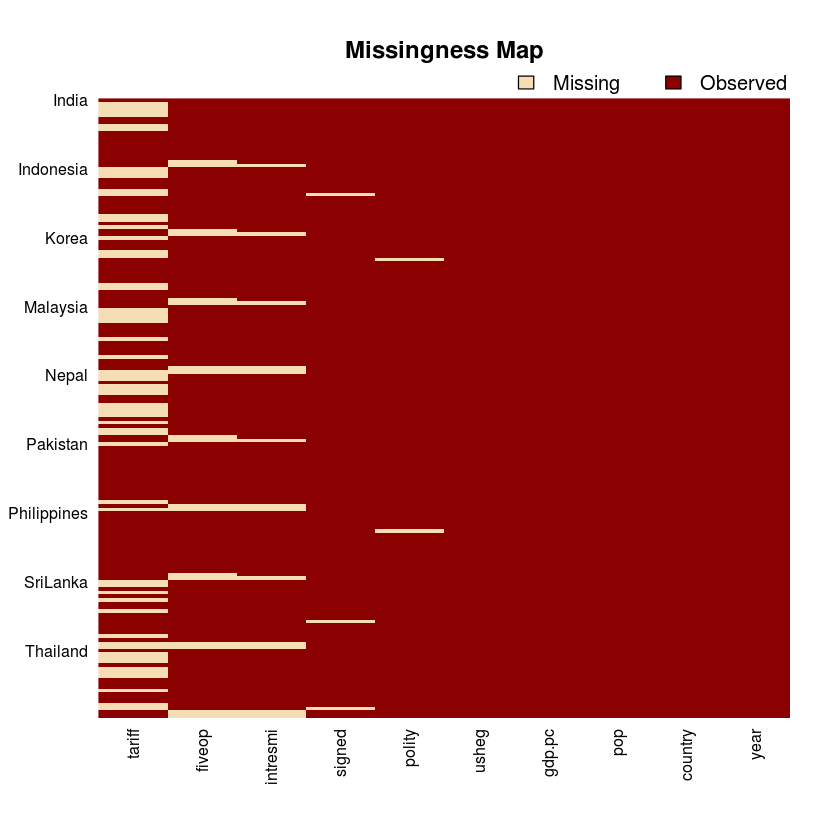

In [98]:
missmap(a.out)

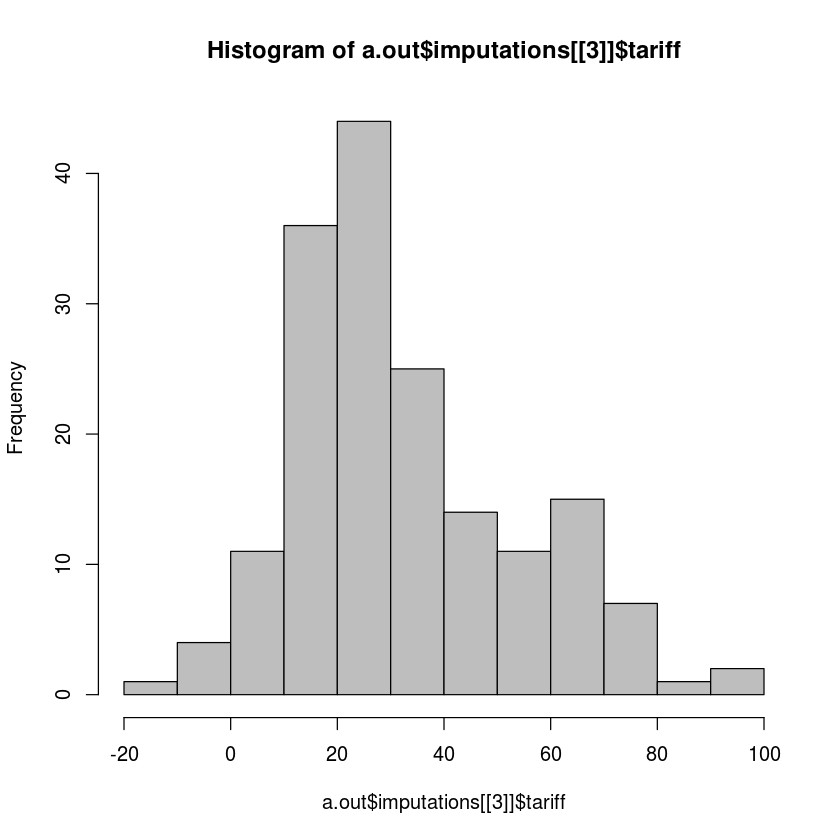

In [100]:
hist(a.out$imputations[[3]]$tariff, col = "grey")

In [101]:
save(a.out, file = "datas/imputation_aout.RData")

In [102]:
?lofactor

### 데이터에서 이상치 검정하여 설정하기

In [106]:
s_ot <- chisq.test()

ERROR: Error in is.data.frame(x): argument "x" is missing, with no default


이상치 판단하는 방법 : 정규성 검정과 박스플롯을 사용하여.

1. 정규성 검정
    정규성을 따르는지 검정하여 정규분포를 따르면 Q1 - 1.5 * IQR 또는 Q3 + 1.5 * IQR 인 경우 99.3%
    

In [104]:
set.seed(3147)
y <- rnorm(100)
b <- which(y %in% boxplot.stats(y)$out)

In [107]:
y[c(b)]

[1] -3.315391  2.685922 -3.055717  2.571203

In [108]:
y[c(1, 33, 64, 74)]

[1] -3.315391  2.685922 -3.055717  2.571203

In [109]:
ot <- cbind(b, y[c(1, 33, 64, 74)])

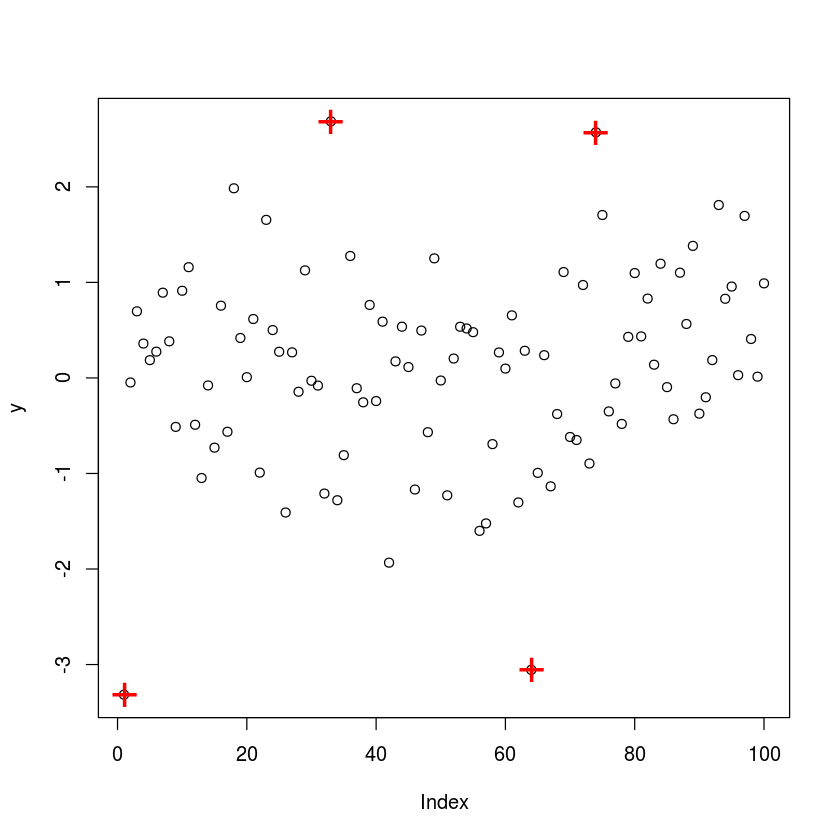

In [110]:
plot(y)
points(ot, col = "red", pch = "+", cex = 2.5)

In [111]:
?boxplot.stats()

In [112]:
install.packages('openxlsx')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [113]:
library('openxlsx')

In [131]:
ham <- read.xlsx('datas/outlier_food.xlsx', sheet = 1, colNames = TRUE, detectDates = TRUE)

ERROR: Error in read.xlsx("datas/outlier_food.xlsx", sheet = 1, colNames = TRUE, : unused argument (encoding = "EUC-KR")


In [115]:
summary(ham)

   민원구분         민원접수번호           접수일          
 Length:31953       Length:31953       Min.   :2014-01-02  
 Class :character   Class :character   1st Qu.:2014-08-06  
 Mode  :character   Mode  :character   Median :2015-04-21  
                                       Mean   :2015-04-07  
                                       3rd Qu.:2015-11-25  
                                       Max.   :2016-06-30  
   처리예정일           실제처리일           처리결과        
 Min.   :2014-01-02   Min.   :2014-01-03   Length:31953      
 1st Qu.:2014-08-08   1st Qu.:2014-08-08   Class :character  
 Median :2015-04-23   Median :2015-04-23   Mode  :character  
 Mean   :2015-04-10   Mean   :2015-04-09                     
 3rd Qu.:2015-11-27   3rd Qu.:2015-11-27                     
 Max.   :2018-07-31   Max.   :2016-07-11                     
 조건부승인여부      조건부기간         조건부사유            업종          
 Length:31953       Length:31953       Length:31953       Length:31953      
 Class :character   Class :character  

In [116]:
ham$sido <- substr(ham$sigun, 1, 2)

In [117]:
# plot 그리기 위해 수치화

ham$sido <- factor(ham$sido)

In [119]:
# 시각 전처리

ham$year <- substr(ham$접수일, 1, 4)
ham$mon <- substr(ham$접수일, 6, 7)
ham$mon <- factor(ham$mon)
ham$mon <- ordered(ham$mon, levels = c("01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"))

In [123]:
ham$민원구분 <- gsub("[^\uAC00-\uD7A3xfe,0-9a-zA-Zㄱ-ㅎ ㅏ-ㅣ가-힣\\s]", "", ham$민원구분)
ham$민원구분 <- factor(ham$민원구분)
levels(ham$민원구분)

[1] "변경민원"     "신규민원"     "재교부민원"   "지위승계민원" "폐업민원"

정규 표현식은

https://regexone.com/lesson/letters_and_digits?

### 시각화

In [126]:
library(ggplot2)

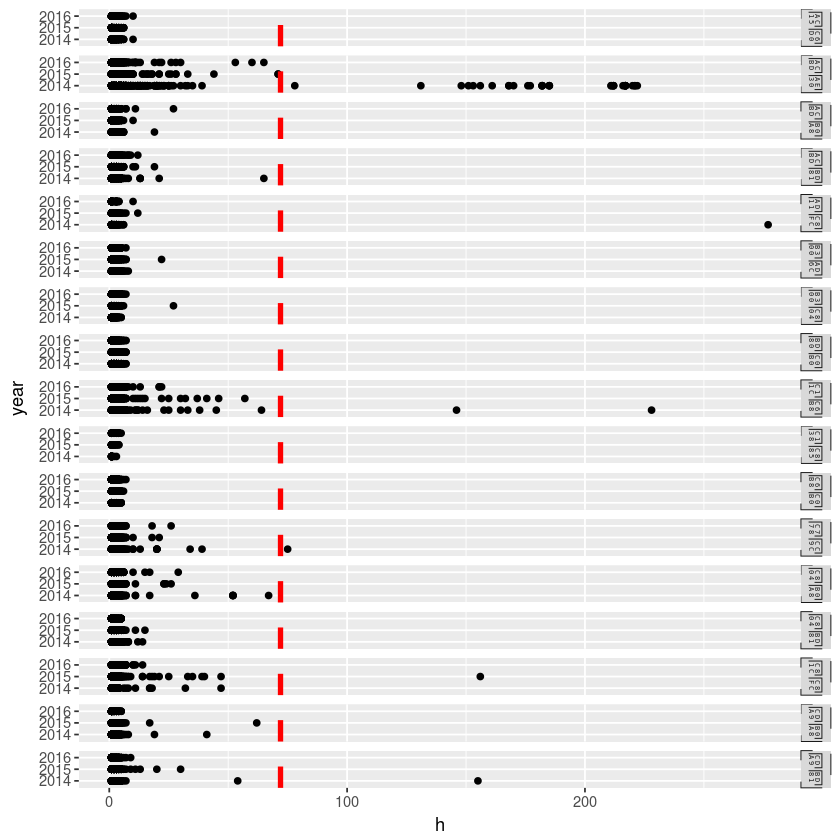

In [129]:
qplot(h, year, data = ham, facets = sido ~.) + geom_vline(xintercept = 72, linetype = "dashed", color = "red", size = 1.5)

In [130]:
out <- subset(ham, h >= 72)

In [132]:
?qplot

In [133]:
install.packages('ggthemes')
install.packages('extrafont')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [134]:
library(lattice)

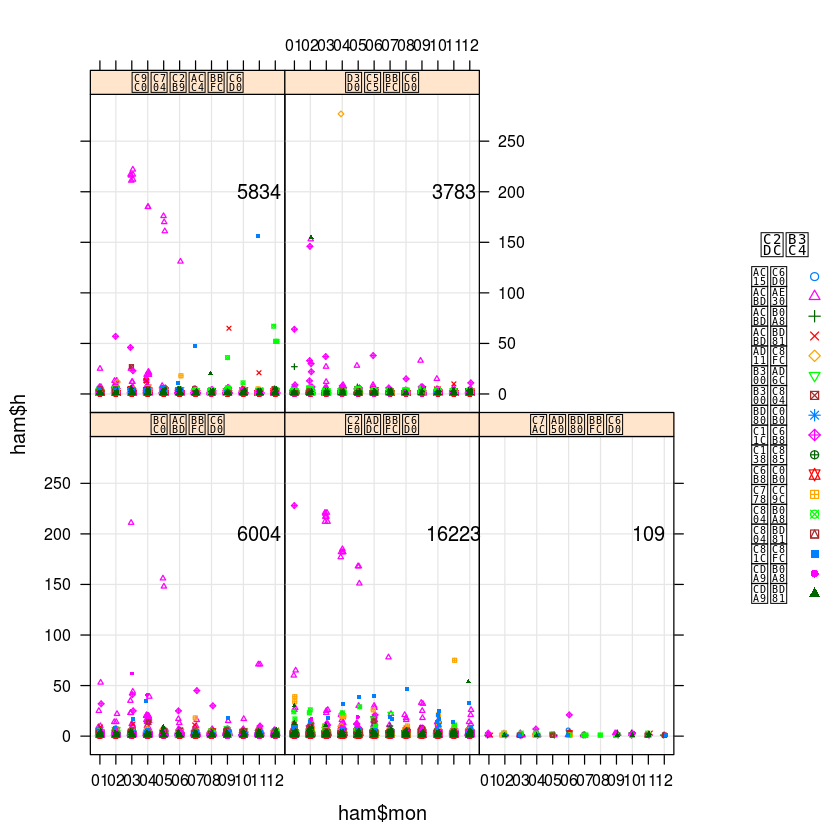

In [141]:
xyplot(ham$h~ham$mon | ham$민원구분,
       data = ham, nint = 5, type = "p", grid = TRUE, cex = 0.4,
       jitter.x = TRUE, group = sido, auto.key = list(title = "시도", space = "right", cex = 1.0),
       par.settings = list(superpose.symbol = list(pch = 1:17)),
       panel = function(x, ...) {
           panel.xyplot(x = x, ...)
           m <- length(x)
           panel.text(x = 11, y = 200, labels = m)
       }
      )

In [137]:
theme_gogamza<- function(base_size = 12, base_family = "NanumGothic"){
     (theme_foundation(base_size = base_size, base_family = base_family) +
        theme(line = element_line(colour = "black"), rect = element_rect(fill = ggthemes_data$fivethirtyeight["ltgray"],
            linetype = 0, colour = NA), text = element_text(colour = ggthemes_data$fivethirtyeight["dkgray"]),
            axis.title = element_text(), axis.text = element_text(),
            axis.ticks = element_blank(), axis.line = element_blank(),
            legend.background = element_rect(), legend.position = "bottom",
            legend.direction = "horizontal", legend.box = "vertical",
            panel.grid = element_line(colour = NULL), panel.grid.major = element_line(colour = ggthemes_data$fivethirtyeight["medgray"]),
            panel.grid.minor = element_blank(), plot.title = element_text(hjust = 0,
                size = rel(1.5), face = "bold"), plot.margin = grid::unit(c(1,
                1, 0.5, 0.5), "lines"), strip.background = element_rect(), panel.margin.x=NULL, panel.margin.y=NULL))
}

In [140]:
theme_set(theme_gray(base_family='Gothic'))

In [142]:
theme_set(theme_gogamza())

ERROR: Error in theme_gogamza(): could not find function "theme_foundation"
